In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import geom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import randint
from scipy.stats import expon
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import weibull_min
from scipy.stats import cauchy
from scipy.stats import laplace
from scipy.stats import hypergeom
from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.stats.weightstats import ztest
from scipy.integrate import quad
from IPython.display import display, Latex


# I.1. Normal (Gaussian) Distribution:

Density of probability : $ f(x) = \displaystyle \frac{1}{ \sqrt{ 2 \pi}} \displaystyle e^{ - \frac{1}{2} ( \frac{x - \mu}{ \sigma}) ^2} \space $ where $ \mu$ is the mean and $ \sigma ^2$ the variance.  

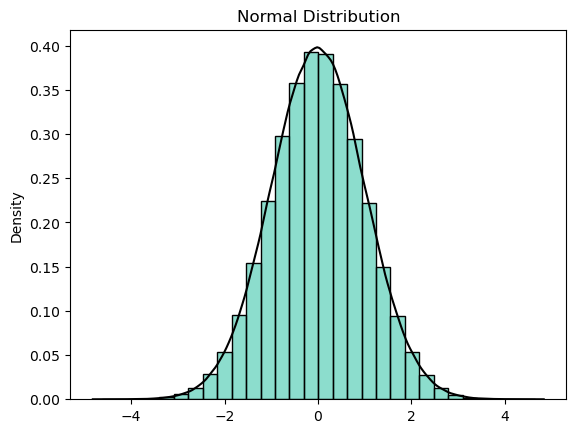

In [2]:
np.random.seed(1)
N = 1000000
normal_data = np.random.normal(0, 1, N)

sns.histplot(normal_data, color='#1ABC9C', alpha=0.5, stat='density', bins=30)
sns.kdeplot(normal_data, color='black')
plt.title('Normal Distribution');

In [3]:
#Fit a normal distribution to the data and get the mean and std of the data
mu, std = norm.fit(normal_data)

print('mean, std = ', np.round(mu, 2),',', np.round(std, 2))

mean, std =  0.0 , 1.0


$Z_{\alpha}$ is a point in the standard normal distribution that has a right probability of $\alpha$

$P(Z>Z_{\alpha}) = \alpha$

$P(Z<Z_{\alpha}) = 1-\alpha$

Integrating the PDF, gives us the cumulative distribution function (CDF) which is a function that maps values to their percentile rank in a distribution. The values in the Z-table are calculated using the cumulative distribution function of a standard normal distribution with a mean of zero and a standard deviation of one. This can be denoted with the equation below:

$ \int_{-\infty}^z \frac{1}{\sqrt{2\pi}}\ \exp(\frac{-z^{2}}{2})\ dz$

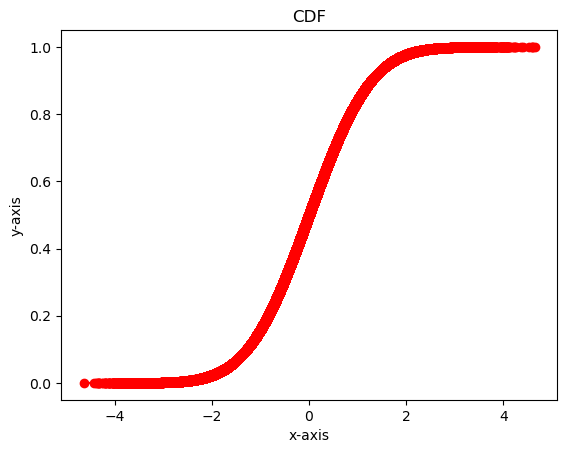

In [4]:
x = np.sort(normal_data)
#Get the cdf values of y
y = np.arange(N) / float(N)
  
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF')
plt.plot(x, y, color ='r', marker='o')

In [5]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0))

standard_normal_table = pd.DataFrame(data = [], index = np.round(np.arange(0, 3.5, .1),2), columns = np.round(np.arange(0.00, .1, .01), 2))

for index in standard_normal_table.index:
    for column in standard_normal_table.columns:
        z = np.round(index + column, 2)
        value, _ = quad(normalProbabilityDensity, np.NINF, z)
        standard_normal_table.loc[index, column] = value

#Formatting to make the table look like a z-table 
standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table.columns = [str(column).ljust(4,'0') for column in standard_normal_table.columns]
standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.5,0.503989,0.507978,0.511966,0.515953,0.519939,0.523922,0.527903,0.531881,0.535856
0.1,0.539828,0.543795,0.547758,0.551717,0.55567,0.559618,0.563559,0.567495,0.571424,0.575345
0.2,0.57926,0.583166,0.587064,0.590954,0.594835,0.598706,0.602568,0.60642,0.610261,0.614092
0.3,0.617911,0.62172,0.625516,0.6293,0.633072,0.636831,0.640576,0.644309,0.648027,0.651732
0.4,0.655422,0.659097,0.662757,0.666402,0.670031,0.673645,0.677242,0.680822,0.684386,0.687933
0.5,0.691462,0.694974,0.698468,0.701944,0.705401,0.70884,0.71226,0.715661,0.719043,0.722405
0.6,0.725747,0.729069,0.732371,0.735653,0.738914,0.742154,0.745373,0.748571,0.751748,0.754903
0.7,0.758036,0.761148,0.764238,0.767305,0.77035,0.773373,0.776373,0.77935,0.782305,0.785236
0.8,0.788145,0.79103,0.793892,0.796731,0.799546,0.802337,0.805105,0.80785,0.81057,0.813267
0.9,0.81594,0.818589,0.821214,0.823814,0.826391,0.828944,0.831472,0.833977,0.836457,0.838913


To find a point that has a left probability of $\alpha$ use the code below:

''
norm.ppf($\alpha$)
''

If you want to find a point that has a right probability of $\alpha$ use the code below:

''
-norm.ppf($\alpha$)
''

This is because the normal distribution is symmetrical so $Z_{1-\alpha} = -Z_{\alpha}$

In [6]:
alpha = 0.95
print(f'The point in the Normal Standard Distribution that has a left probabilty of *{alpha}*: ', norm.ppf(alpha))
print(f'The point in the Normal Standard Distribution that has a right probabilty of *{alpha}*: ', -norm.ppf(alpha))

The point in the Normal Standard Distribution that has a left probabilty of *0.95*:  1.6448536269514722
The point in the Normal Standard Distribution that has a right probabilty of *0.95*:  -1.6448536269514722


Text(-0.8, 0.02, 'P(X<0.95)\n 0.83')

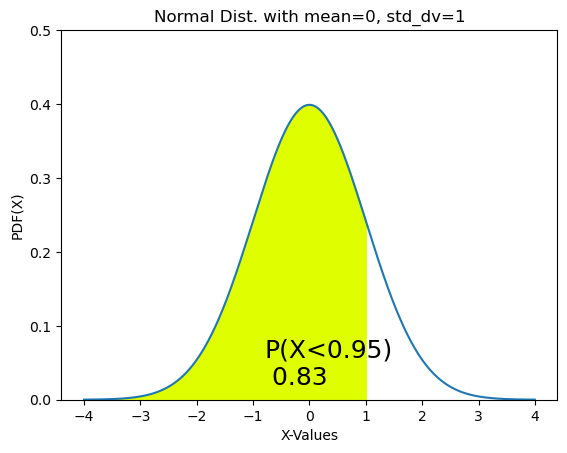

In [8]:
fig, ax = plt.subplots()
 
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(-4,1, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.cdf(alpha)
ax.text(-0.8, 0.02, f'P(X<{np.round(alpha, 3)})\n {np.round(prob, 2)}', fontsize=18)

Text(-0.8, 0.02, 'P(X>0.95)\n 0.17')

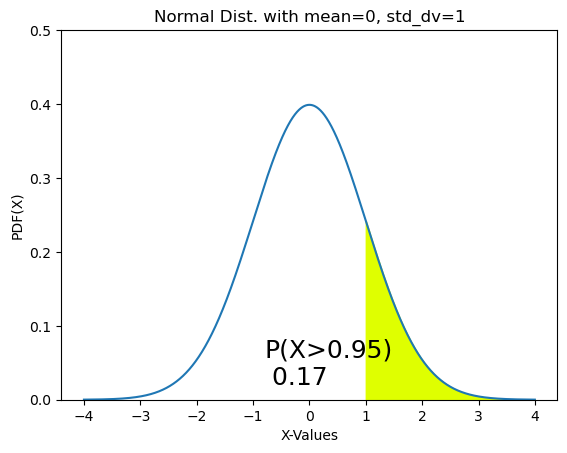

In [10]:
fig, ax = plt.subplots()
 
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(1,4, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.sf(alpha)
ax.text(-0.8, 0.02, f'P(X>{np.round(alpha, 3)})\n {np.round(prob, 2)}', fontsize=18)

The probabilty between *(-1, 1)* in the Normal Standard Distribution is:  0.6826894921370859


Text(-0.8, 0.02, 'P(-1<X<1)\n 0.68')

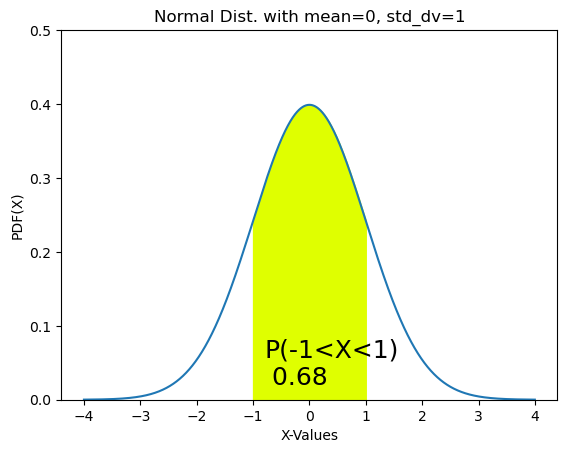

In [12]:
X = -1
Y = 1
print(f'The probabilty between *({X}, {Y})* in the Normal Standard Distribution is: ', norm.cdf(Y) - norm.cdf(X))

fig, ax = plt.subplots()
#Distribution curve
x= np.arange(-4, 4, 0.001)
ax.plot(x, norm.pdf(x, loc=0, scale=1))
ax.set_title("Normal Dist. with mean=0, std_dv=1")
ax.set_xlabel('X-Values')
ax.set_ylabel('PDF(X)')
 
#Fill_between
px=np.arange(-1,1, 0.001)
ax.set_ylim(0, 0.5)
ax.fill_between(px, norm.pdf(px, loc=0, scale=1), color='#DFFF00')

prob = norm.cdf(Y) - norm.cdf(X)
ax.text(-0.8, 0.02, f'P({np.round(X, 3)}<X<{np.round(Y, 3)})\n {np.round(prob, 2)}', fontsize=18)

#  **1.2. Chi-square Distribution:**

$f_{{\chi}^2_n}(x) = \frac{1}{2^{\frac{n}{2}}\Gamma(\frac{n}{2})} x^{\frac{n-2}{2}} \exp(-\frac{x}{2}) \quad  x  \in  (0, \infty)$

$f(x) = probability\ density\ function$

$n	=	degree\ of\ freedom$

$\Gamma(\frac{n}{2}) = gamma\ function$

$\\ $

where  $Γ(\frac{n}{2})$  is a function given by the following integral:
$Γ(\frac{n}{2})= \int_0^{\infty}\ t^{(\frac{n}{2}−1)} e^{−t}\ dt$

$\\ $

$E({\chi}^2_n) =  \frac{\alpha}{\lambda} = \frac{\frac{n}{2}}{\frac{1}{2}} = n $

$Var({\chi}^2_n) = \frac{\alpha}{\lambda^2} = \frac{\frac{n}{2}}{\frac{1}{2}^2} = 2n$

Moment-generating function:

$M_{{\chi}^2_n}(t) = (\frac{\lambda}{\lambda -t})^{\alpha} = (\frac{0.5}{0.5 -t})^{\frac{n}{2}} =  (\sqrt{1-2t})^{-n} $

Text(0.5, 1.0, 'Chi-square Distribution (df=6)')

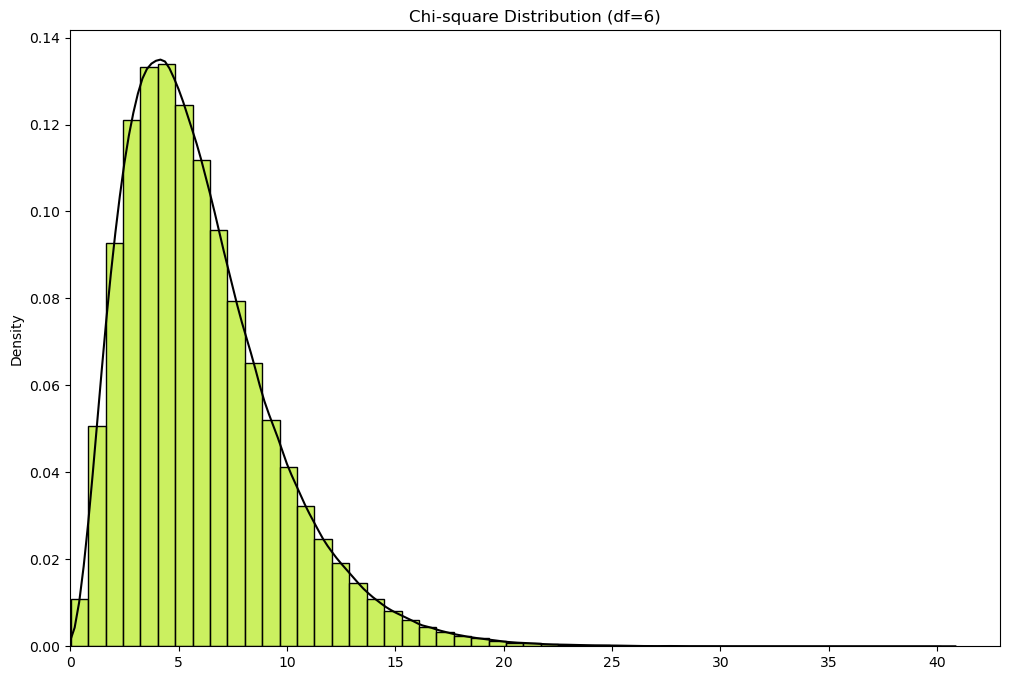

In [18]:
n = 10 ** 6
df = 6  #df = degree of freedom
chi_data = np.random.chisquare(df = df, size = n)

plt.figure(figsize=(12,8))
sns.histplot(chi_data, color='#B5EA1C', alpha=0.7, stat='density', bins=50)
sns.kdeplot(chi_data, color='black')
plt.xlim(left=0)
plt.title(f'Chi-square Distribution (df={df})')

In [19]:
#Fit a chi2 distribution to the data and get the parameters
params = chi2.fit(chi_data)
params
print('df = ', params[0], ',', 'loc = ', params[1], ',', 'scale = ',params[2])

df =  6.010260803978152 , loc =  -0.0007866005839376987 , scale =  0.9981399880645336


The key characteristics of the chi-square distribution depend directly on the degree of freedom. The chi-square distribution curve is skewed to the right, and its shape depends on the degrees of freedom. For $df > 90$, the curve approximates the normal distribution.

Text(0.5, 1.0, 'Chi-square Distribution with different dfs')

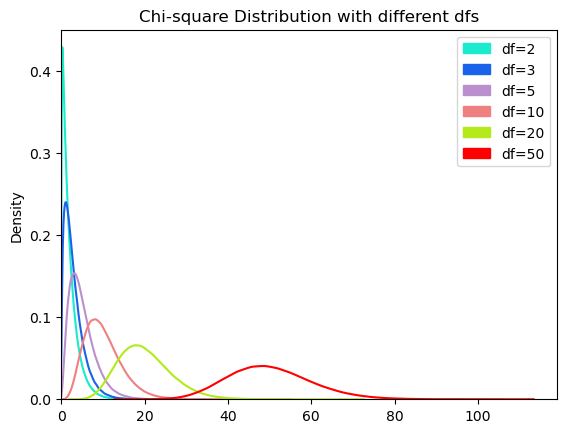

In [20]:
np.random.seed(1)
N = 1000000
df1, df2, df3, df4, df5, df6 = [2, 3, 5, 10, 20, 50]

chi_data1 = np.random.chisquare(df = df1, size = N)
chi_data2 = np.random.chisquare(df = df2, size = N)
chi_data3 = np.random.chisquare(df = df3, size = N)
chi_data4 = np.random.chisquare(df = df4, size = N)
chi_data5 = np.random.chisquare(df = df5, size = N)
chi_data6 = np.random.chisquare(df = df6, size = N)

sns.kdeplot(chi_data1, color='#1AEACD')
sns.kdeplot(chi_data2, color='#1A62EA')
sns.kdeplot(chi_data3, color='#BB8FCE')
sns.kdeplot(chi_data4, color='LightCoral')
sns.kdeplot(chi_data5, color='#B4EA1A')
sns.kdeplot(chi_data6, color='r')

patch1 = mpatches.Patch(color='#1AEACD', label=f'df={df1}')
patch2 = mpatches.Patch(color='#1A62EA', label=f'df={df2}')
patch3 = mpatches.Patch(color='#BB8FCE', label=f'df={df3}')
patch4 = mpatches.Patch(color='LightCoral', label=f'df={df4}')
patch5 = mpatches.Patch(color='#B4EA1A', label=f'df={df5}')
patch6 = mpatches.Patch(color='r', label=f'df={df6}')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5, patch6], frameon=True);
plt.xlim(left=0)
plt.title('Chi-square Distribution with different dfs')

If $Z_{1}, Z_{2}, ..., Z_{n}∼N(0,1)$ and are independent, then $\quad Y = \sum_{i=1}^n Z_i^2 \sim {\chi}^2_n \sim \Gamma(\alpha= \frac{n}{2},  \lambda= \frac{1}{2})$

If $n=2$, the chi-square distribution changes to the exponential function.

If $n$ is even, the chi-square distribution changes to the erlang function.

$\\ $

If $X_{1}, X_{2}, ..., X_{m}$ have chi-square distributions with degree of freedoms $n_{1}, n_{2}, ..., n_{m}$ and are independent then $Y = \sum_{i=1}^m X_i \sim {\chi}^2_{\sum_{i=1}^m {n_i}}$

Text(0.5, 1.0, 'Chi-square Distribution (df=50)')

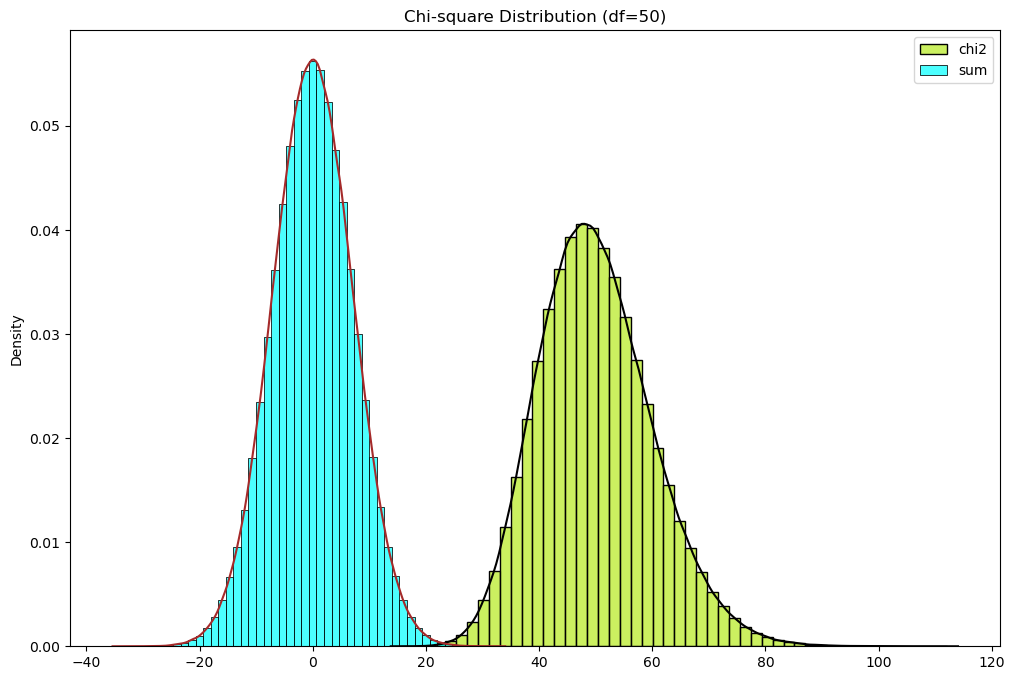

In [2]:
df = 50
N = 10 ** 6
Z = np.zeros((N,df))
for i in range(df):
    Z[:,i] = np.random.normal(size=N)

Z = np.sum(Z, axis=1)


chi_data = np.random.chisquare(df = df, size = N)
plt.figure(figsize=(12,8))
sns.histplot(chi_data, color='#B5EA1C', alpha=0.7, stat='density', bins=50, label = 'chi2')
sns.kdeplot(chi_data, color='black')
sns.histplot(Z, color='cyan', alpha=0.7, stat='density', bins=50, label = 'sum')
sns.kdeplot(Z, color='brown')
plt.legend()
plt.title(f'Chi-square Distribution (df={df})')